# 日本のCOVID19感染者数分析(情報提供:NHK) 観察用

In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
latest_date_str = pref["日付"].max().strftime("%Y/%m/%d")

In [5]:
del pref["都道府県コード"]
del pref["各地の感染者数_累計"]
del pref["各地の死者数_累計"]

In [6]:
all_jp = pref.copy().groupby(["日付"], as_index=False).sum()


In [7]:
all_jp["weekday"] = all_jp["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp = pd.merge(all_jp, weekdays, left_on="weekday", right_index=True, how="left")
pref["weekday"] = pref["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
pref = pd.merge(pref, weekdays, left_on="weekday", right_index=True, how="left")


## 移動平均

In [8]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7
594,2021-09-01,20018,71,2,水,20355.285714,54.714286
595,2021-09-02,18208,65,3,木,19391.571429,56.571429
596,2021-09-03,16723,63,4,金,18326.285714,57.428571
597,2021-09-04,15998,60,5,土,17365.571429,60.000000
598,2021-09-05,12891,30,6,日,16450.714286,57.142857


## 増減速度

In [9]:
all_jp["感染者数移動平均7増減"] = all_jp["感染者数移動平均7"].diff()
all_jp["死者数移動平均7増減"] = all_jp["死者数移動平均7"].diff()
all_jp.tail(7)

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7,感染者数移動平均7増減,死者数移動平均7増減
592,2021-08-30,13621,46,0,月,21517.571429,47.714286,-457.000000,2.000000
593,2021-08-31,17696,65,1,火,20967.000000,51.000000,-550.571429,3.285714
594,2021-09-01,20018,71,2,水,20355.285714,54.714286,-611.714286,3.714286
595,2021-09-02,18208,65,3,木,19391.571429,56.571429,-963.714286,1.857143
596,2021-09-03,16723,63,4,金,18326.285714,57.428571,-1065.285714,0.857143
597,2021-09-04,15998,60,5,土,17365.571429,60.000000,-960.714286,2.571429
598,2021-09-05,12891,30,6,日,16450.714286,57.142857,-914.857143,-2.857143


### 感染者数前週同曜日比

In [10]:
import datetime
all_jp["新規感染者数先週比"] = all_jp["各地の感染者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["死者数先週比"] = all_jp["各地の死者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["新規感染者数先週差"] = all_jp["各地の感染者数_1日ごとの発表数"].diff(periods=7)
all_jp["死者数先週差"] = all_jp["各地の死者数_1日ごとの発表数"].diff(periods=7)


## 重症者数

In [11]:
severe = pd.read_csv("COVID-19-jp/severe_cases_daily.csv")
severe["Date"] = pd.to_datetime(severe["Date"])
severe = severe[severe.Prefecture=="ALL"]
severe.tail()

,Date,Prefecture,Severe cases
23040,2021-09-01,ALL,2158
23088,2021-09-02,ALL,2221
23136,2021-09-03,ALL,2223
23184,2021-09-04,ALL,2207
23232,2021-09-05,ALL,2198


In [12]:
print(severe.count())
print(all_jp.count())

Date            485
Prefecture      485
Severe cases    485
dtype: int64
日付                  599
各地の感染者数_1日ごとの発表数    599
各地の死者数_1日ごとの発表数     599
weekday             599
曜日                  599
感染者数移動平均7           593
死者数移動平均7            593
感染者数移動平均7増減         592
死者数移動平均7増減          592
新規感染者数先週比           587
死者数先週比              546
新規感染者数先週差           592
死者数先週差              592
dtype: int64


## 曜日別陽性者集計

In [13]:
all_jp_week_mean = all_jp.groupby(["weekday"],as_index=False).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_index=True, right_index=True, how="left")
all_jp_week_mean

,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
0,1797.388235,24.976471,月
1,2391.164706,32.929412,火
2,2847.470588,31.658824,水
3,2963.709302,28.953488,木
4,2909.895349,30.372093,金
5,2938.930233,24.534884,土
6,2493.639535,17.755814,日


In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


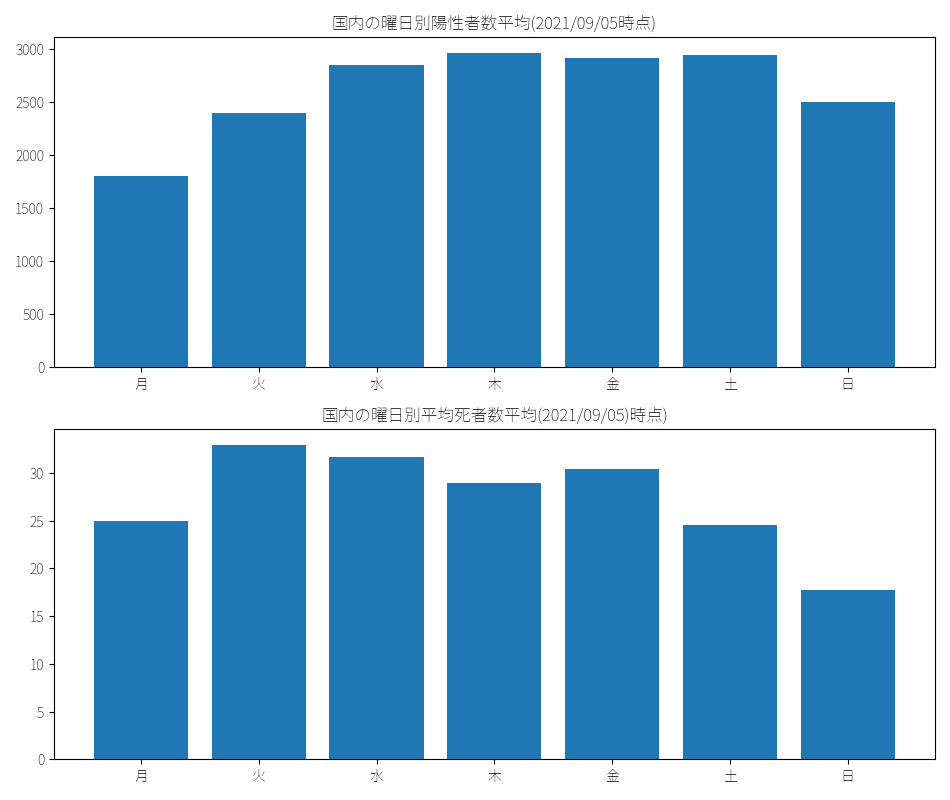

<BarContainer object of 7 artists>

In [15]:
fig=plt.figure(figsize=(9.5,8),tight_layout=True)
plt.subplot(2,1,1) # (rows, columns, panel number)
#fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
#wp_ax = ax[0]
plt.title("国内の曜日別陽性者数平均({}時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
#wd_ax = ax[1]
plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("国内の曜日別平均死者数平均({})時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])

## 2021-１〜６月の死者数

In [16]:
all_jp_2021_1st_half = all_jp.loc[(all_jp["日付"]>=pd.to_datetime("2021-01-01")) & (all_jp["日付"]<=pd.to_datetime("2021-06-30"))]["各地の死者数_1日ごとの発表数"]

In [17]:
print("日数:{}".format(all_jp_2021_1st_half.count()))
print("死者数:{}".format(all_jp_2021_1st_half.sum()))
print("1日あたり死者数:{}".format(all_jp_2021_1st_half.sum()/all_jp_2021_1st_half.count()))

日数:181
死者数:11288
1日あたり死者数:62.3646408839779


## 2021-7以降の死者数

In [18]:
all_jp_after202107 = all_jp.loc[all_jp["日付"]>=pd.to_datetime("2021-07-01")]["各地の死者数_1日ごとの発表数"]

In [19]:
print("日数:{}".format(all_jp_after202107.count()))
print("死者数:{}".format(all_jp_after202107.sum()))
print("1日あたり死者数:{}".format(all_jp_after202107.sum()/all_jp_after202107.count()))

日数:67
死者数:1573
1日あたり死者数:23.47761194029851


## 東京

In [20]:
pref[pref["都道府県名"]=="東京都"].tail(10)

,日付,都道府県名,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日
7777,2021-08-27,東京都,4227,18,4,金
7778,2021-08-28,東京都,3581,19,5,土
7779,2021-08-29,東京都,3081,14,6,日
7780,2021-08-30,東京都,1915,12,0,月
7781,2021-08-31,東京都,2909,15,1,火
7782,2021-09-01,東京都,3168,7,2,水
7783,2021-09-02,東京都,3099,10,3,木
7784,2021-09-03,東京都,2539,10,4,金
7785,2021-09-04,東京都,2362,15,5,土
7786,2021-09-05,東京都,1853,10,6,日
